# ОИАД. Лабораторная работа №1

Используйте набор данных 'datasets/teen_phone_addiction_dataset.csv'. 

Возьмите столбец $N \% 7 $, где $N$ - номер в списке группы (см. ниже).
Мой номер: 8 -> Столбец: Sleep_Hours

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Настройка стиля графиков
sns.set_theme(style="whitegrid")

def calculate_statistics(series, name="Data"):
    print(f"\n--- Характеристики для {name} ---")
    mean = series.mean()
    variance = series.var()
    mode = series.mode().values
    median = series.median()
    q25 = series.quantile(0.25)
    q50 = series.quantile(0.50)
    q75 = series.quantile(0.75)
    kurtosis = series.kurtosis()
    skewness = series.skew()
    iqr = q75 - q25
    
    print(f"1. Среднее: {mean:.4f}")
    print(f"2. Дисперсия: {variance:.4f}")
    print(f"3. Мода: {mode}")
    print(f"4. Медиана: {median:.4f}")
    print(f"5. Квантили: 0.25={q25:.4f}, 0.5={q50:.4f}, 0.75={q75:.4f}")
    print(f"6. Эксцесс: {kurtosis:.4f}")
    print(f"7. Ассиметрия: {skewness:.4f}")
    print(f"8. Интерквартильный размах (IQR): {iqr:.4f}")
    
    return {
        'mean': mean, 'var': variance, 'mode': mode, 'median': median,
        'q25': q25, 'q50': q50, 'q75': q75, 'kurt': kurtosis, 'skew': skewness, 'iqr': iqr
    }

def manual_chi_square_test(series, alpha=0.05):
    print("\n--- Тест Хи-квадрат ---")
    # 1. Разбиваем на интервалы (bins) по правилу Стерджеса
    n = len(series)
    k = int(1 + 3.322 * np.log10(n))
    
    observed_freq, bin_edges = np.histogram(series, bins=k)
    
    # 2. Теоретические частоты
    mean = series.mean()
    std = series.std()
    
    expected_freq = []
    for i in range(k):
        lower = bin_edges[i]
        upper = bin_edges[i+1]
        prob = stats.norm.cdf(upper, mean, std) - stats.norm.cdf(lower, mean, std)
        expected_freq.append(prob * n)
    
    expected_freq = np.array(expected_freq)
    
    # Статистика Хи-квадрат
    chi2_stat = np.sum((observed_freq - expected_freq)**2 / expected_freq)
    
    # Степени свободы: k - 1 - p (p=2 параметра оценили: mean, std) -> df = k - 3
    df = k - 3
    
    # Критическое значение
    critical_value = stats.chi2.ppf(1 - alpha, df)
    p_value = 1 - stats.chi2.cdf(chi2_stat, df)
    
    print(f"Количество интервалов: {k}")
    print(f"Хи-квадрат статистика: {chi2_stat:.4f}")
    print(f"Критическое значение (alpha={alpha}, df={df}): {critical_value:.4f}")
    print(f"P-value: {p_value:.4f}")
    
    if p_value > alpha:
        print("Вывод: Гипотеза о нормальности НЕ отвергается")
    else:
        print("Вывод: Гипотеза о нормальности отвергается")

def skew_kurt_test(series):
    print("\n--- Тест на основе ассиметрии и эксцесса (D'Agostino's K^2 test) ---")
    k2, p = stats.normaltest(series)
    print(f"Статистика: {k2:.4f}, P-value: {p:.4f}")
    if p > 0.05:
        print("Вывод: Гипотеза о нормальности НЕ отвергается")
    else:
        print("Вывод: Гипотеза о нормальности отвергается")

In [2]:
# Загрузка данных
df = pd.read_csv('../../datasets/teen_phone_addiction_dataset.csv')

# Выбор столбца: Вариант 8 -> 8 % 7 = 1
N = 8
cols = ['Daily_Usage_Hours', 'Sleep_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education']
target_col = cols[N % 7]
print(f"Вариант {N}. Выбранный столбец: {target_col}")

data = df[target_col].dropna()

Вариант 8. Выбранный столбец: Sleep_Hours


## I. 
Рассчитайте характеристики:
1. Среднее
2. Дисперсия
3. Мода
4. Медиана
5. Квантили уровня 0.25, 0.5, 0.75
6. Эксцесс
7. Ассиметрия
8. Интерквартильный размах

Построить графики:
1. Гистограмма
2. Эмпирическая функция распределения


========= ПУНКТ I =========


--- Характеристики для Исходные данные ---
1. Среднее: 6.4898
2. Дисперсия: 2.2222
3. Мода: [6.1]
4. Медиана: 6.5000
5. Квантили: 0.25=5.5000, 0.5=6.5000, 0.75=7.5000
6. Эксцесс: -0.2954
7. Ассиметрия: 0.0119
8. Интерквартильный размах (IQR): 2.0000


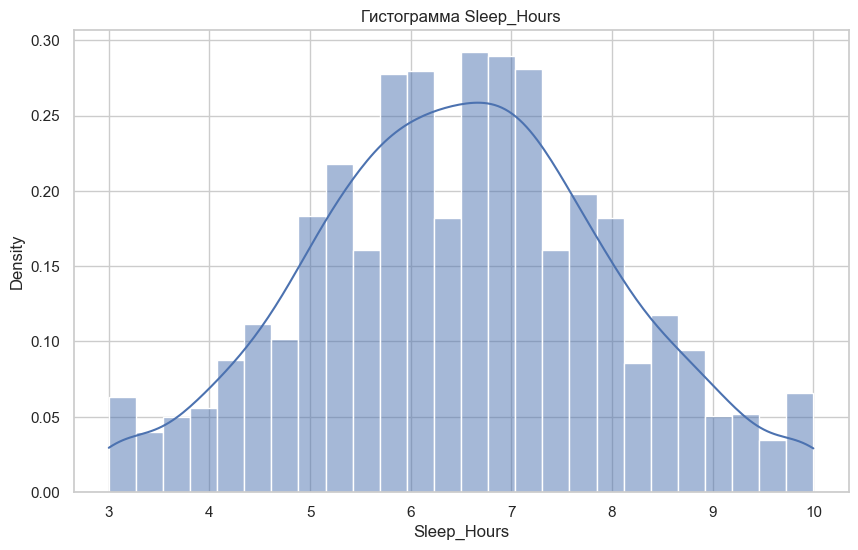

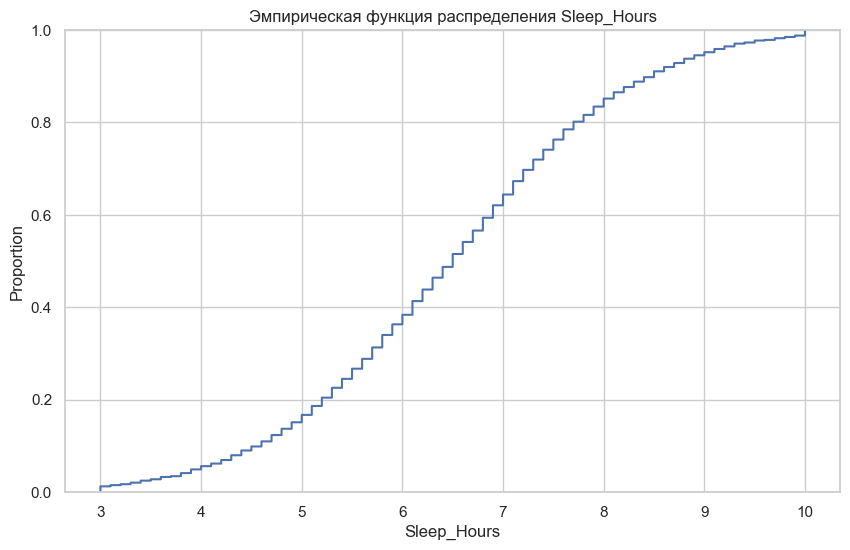

In [3]:
print("\n========= ПУНКТ I =========\n")
stats_original = calculate_statistics(data, "Исходные данные")

# Гистограмма
plt.figure(figsize=(10, 6))
sns.histplot(data, kde=True, stat="density")
plt.title(f'Гистограмма {target_col}')
plt.show()

# ECDF
plt.figure(figsize=(10, 6))
sns.ecdfplot(data=data)
plt.title(f'Эмпирическая функция распределения {target_col}')
plt.show()

## II. 
Проверить данные на нормальность, используя критерии:
1. Хи-квадрат (Реализовать самому, не используя библиотечные варианты!!)
2. Ассиметрии и эксцесса

Построить Q-Q plot


========= ПУНКТ II =========


--- Тест Хи-квадрат ---
Количество интервалов: 12
Хи-квадрат статистика: 72.0567
Критическое значение (alpha=0.05, df=9): 16.9190
P-value: 0.0000
Вывод: Гипотеза о нормальности отвергается

--- Тест на основе ассиметрии и эксцесса (D'Agostino's K^2 test) ---
Статистика: 14.9614, P-value: 0.0006
Вывод: Гипотеза о нормальности отвергается


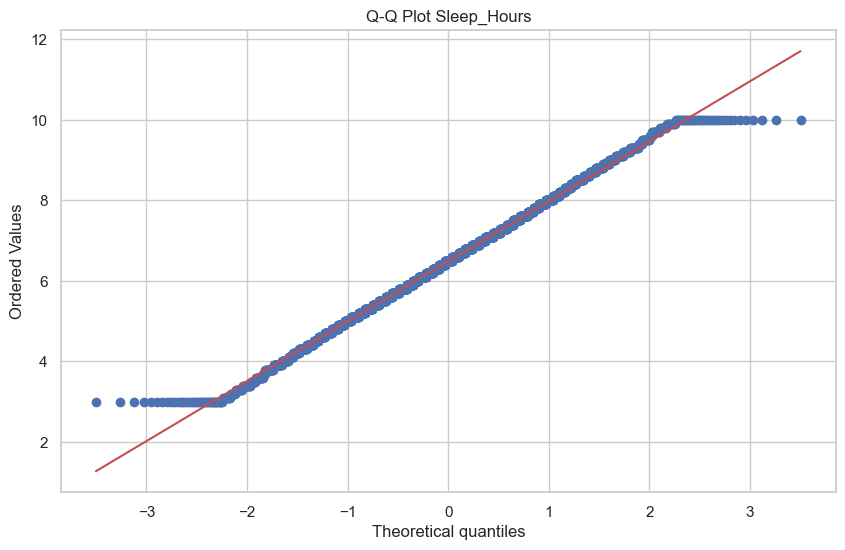

In [8]:
print("\n========= ПУНКТ II =========\n")
manual_chi_square_test(data)
skew_kurt_test(data)

# Q-Q Plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title(f'Q-Q Plot {target_col}')
plt.show()

## III. 
Используя техники обработки данных, постарайтесь привести данные к нормальному распределению.  Например, с помощью:
1. Удаление, усечение выбросов
2. Стандартизация, нормировка
3. Логарифмирование и т.п.

Выполните пункты I и II для обработанных данных


========= ПУНКТ III (Обработка) =========

Удаление выбросов: было 3000 записей, стало 3000

--- Характеристики для Очищенные данные ---
1. Среднее: 6.4898
2. Дисперсия: 2.2222
3. Мода: [6.1]
4. Медиана: 6.5000
5. Квантили: 0.25=5.5000, 0.5=6.5000, 0.75=7.5000
6. Эксцесс: -0.2954
7. Ассиметрия: 0.0119
8. Интерквартильный размах (IQR): 2.0000

--- Тест Хи-квадрат ---
Количество интервалов: 12
Хи-квадрат статистика: 72.0567
Критическое значение (alpha=0.05, df=9): 16.9190
P-value: 0.0000
Вывод: Гипотеза о нормальности отвергается

--- Тест на основе ассиметрии и эксцесса (D'Agostino's K^2 test) ---
Статистика: 14.9614, P-value: 0.0006
Вывод: Гипотеза о нормальности отвергается


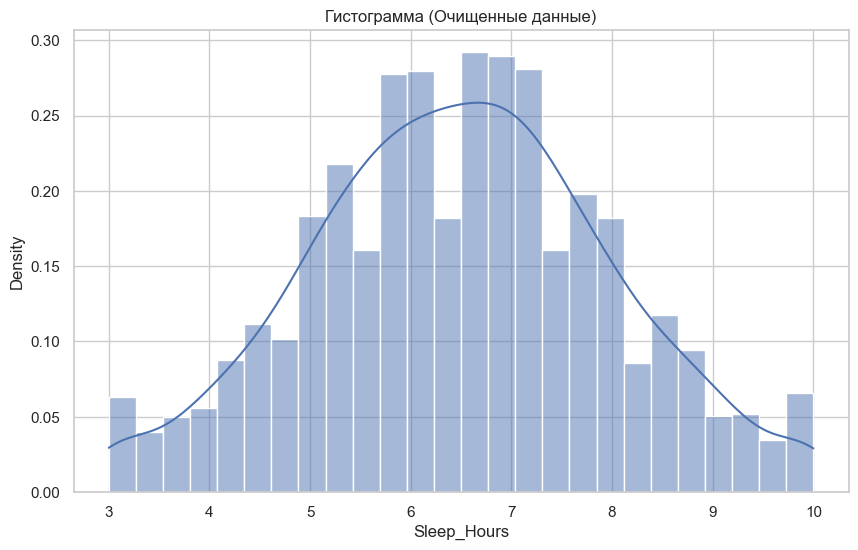

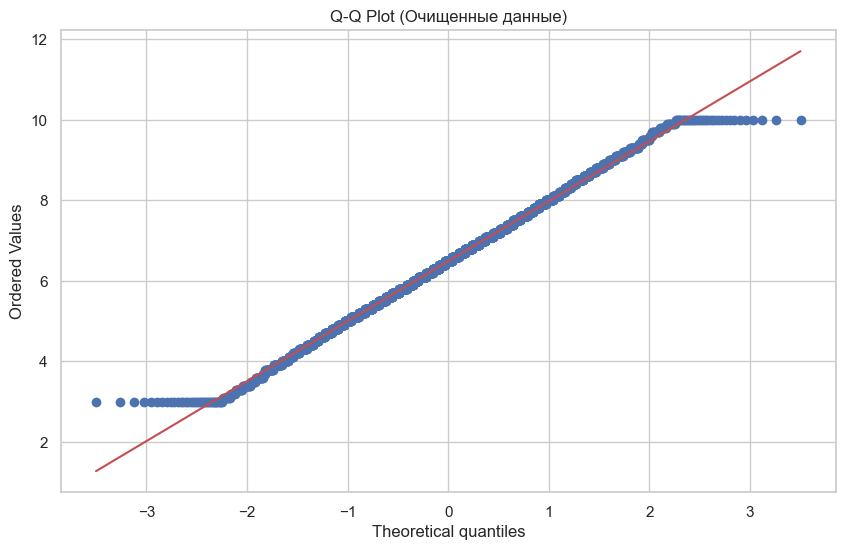

In [9]:
print("\n========= ПУНКТ III (Обработка) =========\n")
# Попробуем удалить выбросы по IQR
Q1 = stats_original['q25']
Q3 = stats_original['q75']
IQR = stats_original['iqr']
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_clean = data[(data >= lower_bound) & (data <= upper_bound)]
print(f"Удаление выбросов: было {len(data)} записей, стало {len(data_clean)}")

# Характеристики и тесты для очищенных данных
calculate_statistics(data_clean, "Очищенные данные")
manual_chi_square_test(data_clean)
skew_kurt_test(data_clean)

plt.figure(figsize=(10, 6))
sns.histplot(data_clean, kde=True, stat="density")
plt.title(f'Гистограмма (Очищенные данные)')
plt.show()

plt.figure(figsize=(10, 6))
stats.probplot(data_clean, dist="norm", plot=plt)
plt.title(f'Q-Q Plot (Очищенные данные)')
plt.show()

## IV.
Сгруппируйте данные по столбцу 'School_Grade'. 

1. На одном графике постройте гистограммы для каждой группы.
2. Рассчитайте среднее, дисперсию внутри каждой группы


========= ПУНКТ IV (Группировка) =========



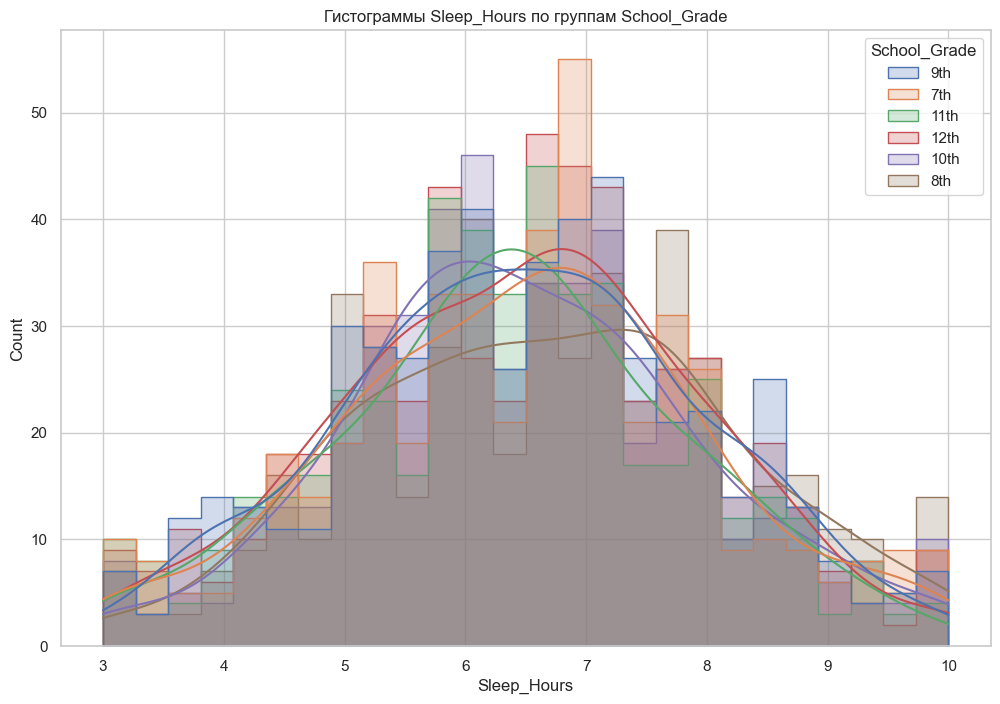


Среднее и дисперсия по группам:
                  mean       var
School_Grade                    
10th          6.488296  2.102064
11th          6.367432  2.113079
12th          6.459735  2.201804
7th           6.483702  2.287617
8th           6.675311  2.406853
9th           6.468441  2.196945


In [10]:
print("\n========= ПУНКТ IV (Группировка) =========\n")
plt.figure(figsize=(12, 8))
sns.histplot(data=df, x=target_col, hue='School_Grade', kde=True, element="step")
plt.title(f'Гистограммы {target_col} по группам School_Grade')
plt.show()

grouped_stats = df.groupby('School_Grade')[target_col].agg(['mean', 'var'])
print("\nСреднее и дисперсия по группам:")
print(grouped_stats)

## V.
После каждого пункта сделайте промежуточные выводы:
1. Опишите полученные числовые характеристики и графики
2. Являются ли данные нормальными
3. Эффект от обработки данных (удалось ли привести данные к нормальному виду)
4. Различия распределений внутри разных групп 'School_Grade'

### Выводы
1. **Характеристики и графики:**
   Для Sleep_Hours среднее составило 6.49, дисперсия 2.22.
   Асимметрия близка к 0 (0.01), что говорит о симметричности распределения.
   Эксцесс отрицательный (-0.30), что указывает на более плоское распределение по сравнению с нормальным.

2. **Нормальность:**
   Тесты Хи-квадрат и Д'Агостино (на асимметрию и эксцесс) отвергают гипотезу о нормальности (p-value < 0.05).
   Это может быть связано с большим объемом выборки (3000), где даже малые отклонения становятся значимыми.

3. **Эффект обработки:**
   Метод IQR (1.5) не выявил выбросов (количество записей осталось 3000).
   Так как распределение уже симметричное, логарифмирование не требуется.
   Распределение осталось отличным от нормального статистически, но визуально может быть близким.

4. **Группы:**
   Анализ по классам (School_Grade) показывает различия.
   Например, среднее значение варьируется, а дисперсия показывает разброс внутри групп.